In [1]:
from astropy.io import fits
import numpy as np
from astropy.visualization import simple_norm
import pylab as plt
from astropy import wcs
import os
from reproject import reproject_interp
import PIL
#import pyavm
import shutil
from matplotlib.colors import LinearSegmentedColormap
def save_rgb(img, filename, avm=None, flip=-1):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::flip,:,:])
    img.save(filename)
    if avm is not None:
        base = os.path.basename(filename)
        dir = os.path.dirname(filename)
        avmname = os.path.join(dir, 'avm_'+base)
        avm.embed(filename, avmname)
        shutil.move(avmname, filename)
    return img



In [2]:

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F300M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

image_sub_filenames = {
    "f405n-f410m": "/orange/adamginsburg/jwst/w51/F405_minus_F410cont_pipeline_v0.1.fits",
    "f410m-f405n": "/orange/adamginsburg/jwst/w51/F410_minus_F405_fractional_bandwidth_pipeline_v0.1.fits",
    "f187n-f182m": "/orange/adamginsburg/jwst/w51/F187_minus_F182cont_pipeline_v0.1.fits",

}


In [3]:
from astropy.wcs import WCS

reproj_dir = '/orange/adamginsburg/jwst/w51/data_reprojected_480/'
repr480_image_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_filenames.items()}
repr480_image_filenames = {x: (reproj_dir+os.path.basename(y)) for x,y in repr480_image_filenames.items()}





In [4]:

ref_fits = fits.open(repr480_image_filenames['f480m'])
tgt_header = fits.getheader(repr480_image_filenames['f480m'], ext=('SCI', 1))
wcs_header = WCS(tgt_header)

Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


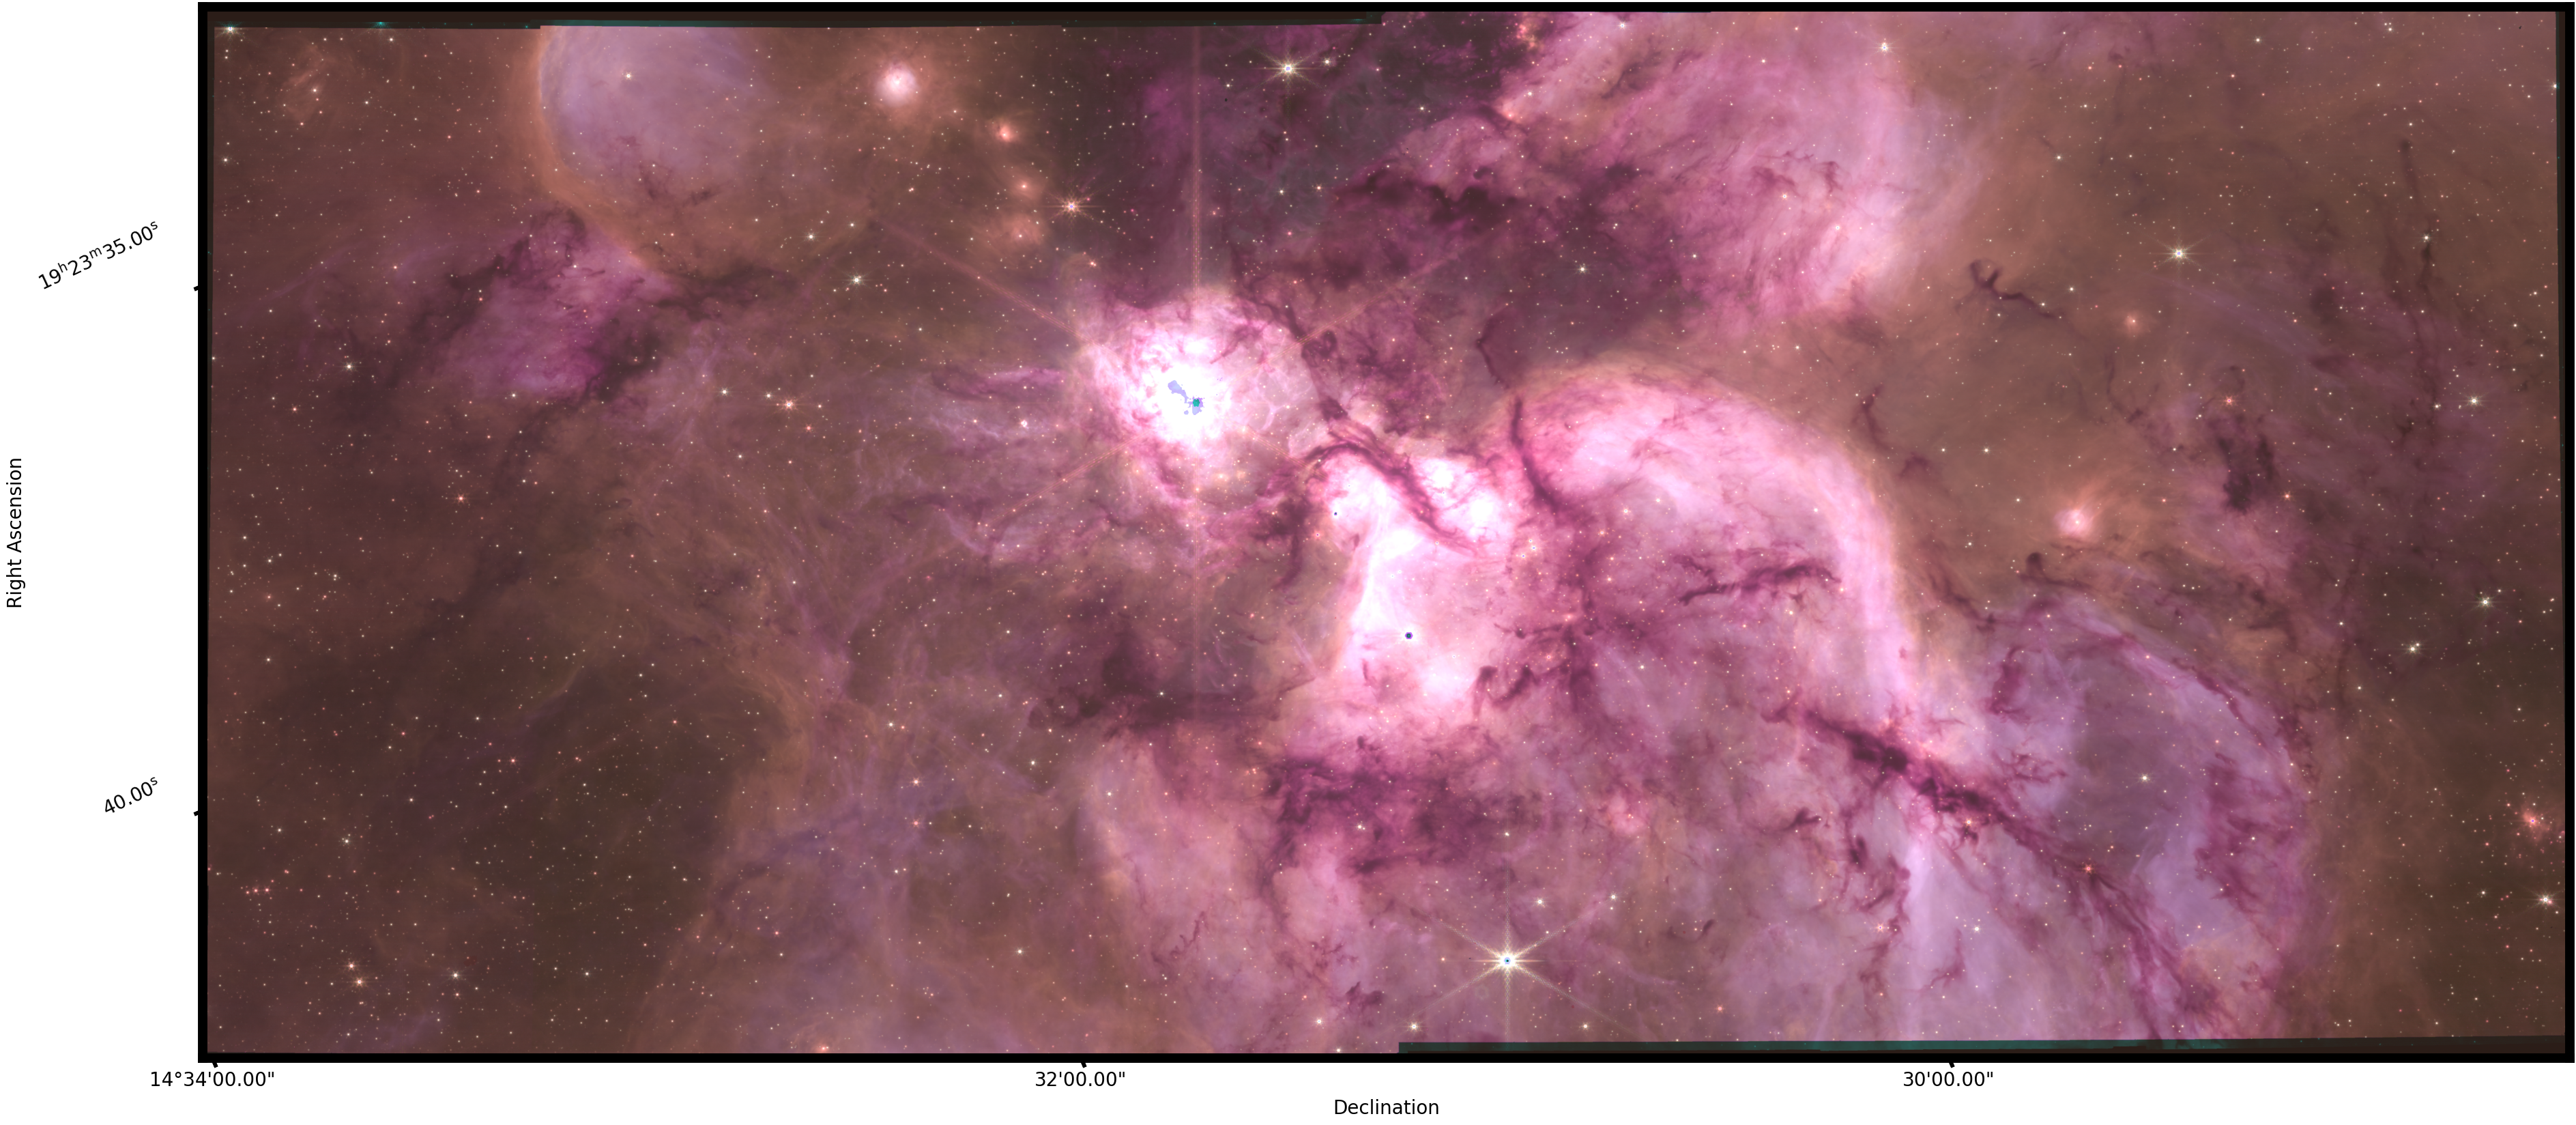

In [5]:
from matplotlib import colors
import astropy.units as u
import matplotlib as mpl
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
mpl.rcParams['axes.linewidth'] = 10
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
magenta_cmap = LinearSegmentedColormap.from_list('magenta', [(0,0,0), (1,0,1)])
yellow_cmap  = LinearSegmentedColormap.from_list('yellow',  [(0,0,0), (1,1,0)])
cyan_cmap    = LinearSegmentedColormap.from_list('cyan',    [(0,0,0), (0,1,1)])

# Opacity for each layer (0=transparent, 1=opaque)
alpha_magenta = 0.7
alpha_yellow  = 0.78
alpha_cyan    = 0.74

# Normalize each image
#norm1 = simple_norm(img1, stretch='asinh', min_percent=1, max_percent=99)
#norm2 = simple_norm(img2, stretch='asinh', min_percent=1, max_percent=99)
#norm3 = simple_norm(img3, stretch='asinh', min_percent=1, max_percent=97)

img1 = fits.getdata(repr480_image_filenames['f405n'], ext=('SCI', 1))
img2 = fits.getdata(repr480_image_filenames['f360m'], ext=('SCI', 1))
img3 = fits.getdata(repr480_image_filenames['f187n'], ext=('SCI', 1))
norm1 = simple_norm(img1, stretch='log', vmin=-2.12, vmax=1967)
norm2 = simple_norm(img2, stretch='log', vmin=-2.12, vmax=1597)
norm3 = simple_norm(img3, stretch='log', vmin=-2.12, vmax=9431)

# Map each image to its colormap and convert to RGB arrays
magenta_rgb = magenta_cmap(norm1(img1))[...,:3] * alpha_magenta
yellow_rgb  = yellow_cmap(norm2(img2))[...,:3]  * alpha_yellow
cyan_rgb    = cyan_cmap(norm3(img3))[...,:3]    * alpha_cyan

# Combine by summing and clipping
composite = magenta_rgb + yellow_rgb + cyan_rgb
composite = np.clip(composite, 0, 1)

fig = plt.figure(figsize=(48,20), )
ax = fig.add_subplot(111, projection=wcs_header)

ax.imshow(composite, origin='lower', )
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
ra.set_axislabel('Right Ascension')
ra.set_ticklabel(rotation=25, pad=30)
dec.set_axislabel('Declination')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
plt.savefig('rgbs/overview_187-360-405.png', dpi=100, bbox_inches='tight')

In [6]:
import reproject
from astropy.coordinates import FK5
def expand_wcs_to_cover_all(reference_wcs, input_hdus):
    """
    Expand a WCS (keeping its orientation & pixel scale) to cover
    the footprints of all given HDUs.
    """
    # Get pixel scale (deg/pix)
    cdelt = np.abs(reference_wcs.wcs.cdelt)

    # Convert all images' corners to world coords, then to pixel coords in ref WCS
    all_pixels = []
    for hdu in input_hdus:
        wcs_in = WCS(hdu.header)
        ny, nx = hdu.data.shape
        corners_pix = np.array([[0,0],[nx,0],[0,ny],[nx,ny]])
        corners_world = wcs_in.all_pix2world(corners_pix, 0)
        corners_in_refpix = reference_wcs.all_world2pix(corners_world, 0)
        all_pixels.append(corners_in_refpix)

    all_pixels = np.vstack(all_pixels)

    # Find bounding box in reference pixel coordinates
    xmin, ymin = np.floor(all_pixels.min(axis=0)).astype(int)
    xmax, ymax = np.ceil(all_pixels.max(axis=0)).astype(int)

    # Compute new shape
    new_nx = xmax - xmin
    new_ny = ymax - ymin

    # Shift CRPIX so that old reference origin moves accordingly
    new_wcs = reference_wcs.deepcopy()
    new_wcs.wcs.crpix -= [xmin, ymin]

    return new_wcs, (new_ny, new_nx)

# --- Usage ---
filters = ['f140m', 'f360m', 'f410m', 'f560w']
files = [image_filenames[filt] for filt in filters]
hdus = [fits.open(f)['SCI'] for f in files]

# Expand reference WCS to cover all images
expanded_wcs, shape_out = expand_wcs_to_cover_all(WCS(hdus[0].header), hdus)

## Reproject each image into expanded WCS
#for i, hdu in enumerate(hdus):
#    array, footprint = reproject_interp(hdu, expanded_wcs, shape_out=shape_out)
#    fits.writeto(f"/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/{filters[i]}.fits", array, expanded_wcs.to_header(), overwrite=True)

Set DATE-AVG to '2025-05-06T16:59:22.406' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:06:02.828' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-08T11:22:58.102' from MJD-AVG.
Set DATE-END to '2024-09-08T12:35:44.015' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.810003 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291940033.618 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [7]:
"""

new_basepath = '/orange/adamginsburg/jwst/w51/data_reprojected_480/'
repr480_image_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_filenames.items()}
repr480_image_filenames = {x: (new_basepath+os.path.basename(y)) for x,y in repr480_image_filenames.items()}
repr480_image_sub_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_sub_filenames.items()}
repr480_image_sub_filenames = {x: (new_basepath+os.path.basename(y)) for x,y in repr480_image_sub_filenames.items()}


#for filtername in ['f162m', 'f360w', 'f770w']:
#    if not os.path.exists(repr480_image_filenames[filtername]):
#        print(f"Reprojecting {filtername} {image_filenames[filtername]} to {repr480_image_filenames[filtername]}")
#        result,_ = reproject.reproject_interp(image_filenames[filtername], tgt_header, hdu_in='SCI')
#        hdu = fits.PrimaryHDU(data=result, header=tgt_header)
#        hdu.writeto(repr480_image_filenames[filtername], overwrite=True)

from reproject.mosaicking import find_optimal_celestial_wcs
hdu1 = fits.open(image_filenames['f162m'])['SCI']
hdu2 = fits.open(image_filenames['f360m'])['SCI']
hdu3 = fits.open(image_filenames['f560w'])['SCI']
wcs1 = WCS(hdu1.header)
wcs2 = WCS(hdu2.header)
wcs3 = WCS(hdu3.header)
array_list = [
    (hdu1.data, wcs1),
    (hdu2.data, wcs2),
    (hdu3.data, wcs3)
]

ref_hdu = fits.open(image_filenames['f140m'])['SCI']
ref_wcs = WCS(ref_hdu.header)

projection = ref_wcs.wcs.ctype[0].split('-')[-1]  # e.g., 'TAN'
print(projection)
optimal_wcs, shape_out = find_optimal_celestial_wcs(array_list, projection=projection, auto_rotate=False   )
print(optimal_wcs)
print(wcs1)
print(wcs3)
"""

'\n\nnew_basepath = \'/orange/adamginsburg/jwst/w51/data_reprojected_480/\'\nrepr480_image_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_filenames.items()}\nrepr480_image_filenames = {x: (new_basepath+os.path.basename(y)) for x,y in repr480_image_filenames.items()}\nrepr480_image_sub_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_sub_filenames.items()}\nrepr480_image_sub_filenames = {x: (new_basepath+os.path.basename(y)) for x,y in repr480_image_sub_filenames.items()}\n\n\n#for filtername in [\'f162m\', \'f360w\', \'f770w\']:\n#    if not os.path.exists(repr480_image_filenames[filtername]):\n#        print(f"Reprojecting {filtername} {image_filenames[filtername]} to {repr480_image_filenames[filtername]}")\n#        result,_ = reproject.reproject_interp(image_filenames[filtername], tgt_header, hdu_in=\'SCI\')\n#        hdu = fits.PrimaryHDU(data=result, header=tgt_header)\n#        hdu.writeto(repr480_image_filenames[filtername], overwrite=True

In [ ]:
"""
# Reproject all images to this common WCS and shape
reproj1, _ = reproject_interp((hdu1.data, wcs1), optimal_wcs, shape_out=shape_out)
reproj2, _ = reproject_interp((hdu2.data, wcs2), optimal_wcs, shape_out=shape_out)
reproj3, _ = reproject_interp((hdu3.data, wcs3), optimal_wcs, shape_out=shape_out)

hdu1_new = fits.PrimaryHDU(data=reproj1, header=optimal_wcs.to_header())
hdu2_new = fits.PrimaryHDU(data=reproj2, header=optimal_wcs.to_header())
hdu3_new = fits.PrimaryHDU(data=reproj3, header=optimal_wcs.to_header())
hdu1_new.writeto('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f162m.fits', overwrite=True)
hdu2_new.writeto('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f360m.fits', overwrite=True)
hdu3_new.writeto('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f560w.fits', overwrite=True)
"""

"\n# Reproject all images to this common WCS and shape\nreproj1, _ = reproject_interp((hdu1.data, wcs1), optimal_wcs, shape_out=shape_out)\nreproj2, _ = reproject_interp((hdu2.data, wcs2), optimal_wcs, shape_out=shape_out)\nreproj3, _ = reproject_interp((hdu3.data, wcs3), optimal_wcs, shape_out=shape_out)\n\nhdu1_new = fits.PrimaryHDU(data=reproj1, header=optimal_wcs.to_header())\nhdu2_new = fits.PrimaryHDU(data=reproj2, header=optimal_wcs.to_header())\nhdu3_new = fits.PrimaryHDU(data=reproj3, header=optimal_wcs.to_header())\nhdu1_new.writeto('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f162m.fits', overwrite=True)\nhdu2_new.writeto('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f360m.fits', overwrite=True)\nhdu3_new.writeto('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f560w.fits', overwrite=True)\n"

: 

In [ ]:
print(shape_out)
from regions import Regions
reg_dir = '/orange/adamginsburg/w51/TaehwaYoo/region_jwst_highlights/'
nircam_footprint_reg = Regions.read(reg_dir+'nircam_footprint.reg')
miri_footprint_reg = Regions.read(reg_dir+'miri_footprint.reg')
w51e_reg=Regions.read(reg_dir+'w51e_area.reg')
w51n_reg=Regions.read(reg_dir+'w51n_area.reg')

img3 = fits.getdata('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f360m.fits')
img2 = fits.getdata('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f410m.fits')
img1 = fits.getdata('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f560w.fits')
print(img1.shape, img2.shape, img3.shape)
ref_fits = fits.open('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f162m.fits')
tgt_header = fits.getheader('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f162m.fits')

wcs_header = WCS(tgt_header)
nircam_footprint_pix_reg = nircam_footprint_reg[0].to_pixel(wcs_header)
miri_footprint_pix_reg = miri_footprint_reg[0].to_pixel(wcs_header)
w51e_pix_reg = w51e_reg[0].to_pixel(wcs_header)
w51n_pix_reg = w51n_reg[0].to_pixel(wcs_header)
# Opacity for each layer (0=transparent, 1=opaque)
alpha_magenta = 1
alpha_yellow  = 1
alpha_cyan    = 1

# Normalize each image
#norm1 = simple_norm(img1, stretch='asinh', min_percent=1, max_percent=99)
#norm2 = simple_norm(img2, stretch='asinh', min_percent=1, max_percent=99)
#norm3 = simple_norm(img3, stretch='asinh', min_percent=1, max_percent=97)

norm3 = simple_norm(img3, stretch='log', vmin=0.04751104975593544, vmax=3197.2741485349834)
norm2 = simple_norm(img2, stretch='log', vmin=0.04215657140906008, vmax=2931.7081546442732)
norm1 = simple_norm(img1, stretch='log', vmin=-8.238391068626964, vmax=11862.910123454365)

cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])

# Map each image to its colormap and convert to RGB arrays
magenta_rgb = cmap1(norm1(img1))[...,:3] * alpha_magenta
yellow_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_yellow
cyan_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_cyan

# Combine by summing and clipping
composite = magenta_rgb + yellow_rgb + cyan_rgb
composite = np.clip(composite, 0, 1)

fig = plt.figure(figsize=(48,20), )
ax = fig.add_subplot(111, projection=wcs_header)

ax.imshow(composite, origin='lower', )

ax.add_artist(nircam_footprint_pix_reg.as_artist(color='w', alpha=0.5, lw=3))
ax.add_artist(miri_footprint_pix_reg.as_artist(color='w', alpha=0.5, lw=3))
#ax.add_artist(w51e_pix_reg.as_artist(color='k',  lw=4))
#ax.add_artist(w51n_pix_reg.as_artist(color='k',  lw=4))
ax.text(0.01*composite.shape[1], 0.75*composite.shape[0], 'NIRCam F360M+F410M', color='w', fontsize=30, ha='left', va='top')
ax.text(0.62*composite.shape[1], 0.9*composite.shape[0], 'MIRI F560W', color='w', fontsize=30, ha='left', va='top', rotation=-48)
#ax.text(0.6*composite.shape[1], 0.35*composite.shape[0], 'W51-E', color='k', fontsize=20, ha='left', va='top')
#ax.text(0.4*composite.shape[1], 0.75*composite.shape[0], 'W51-IRS2', color='k', fontsize=20, ha='left', va='top')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
ra.set_axislabel('Right Ascension')
ra.set_ticklabel(rotation=90, pad=30)
dec.set_axislabel('Declination')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')



arrow_start_pixel = (1000, 9000)  # (x, y) in pixels

# Compute a point 0.002 degrees north in sky coords
sky_coord_start = wcs_header.pixel_to_world(*arrow_start_pixel)
sky_coord_north = sky_coord_start.spherical_offsets_by(0*u.deg, 0.004*u.deg)  # 0.002 deg north

# Convert back to pixel coordinates
arrow_end_pixel = wcs_header.world_to_pixel(sky_coord_north)

# Draw arrow
print(arrow_end_pixel, arrow_start_pixel)
ax.annotate(
    '', xy=arrow_end_pixel, xytext=arrow_start_pixel,
    arrowprops=dict( color='white', width=2,headwidth=6, frac=0.05, ec='w', fc='w'),
    xycoords='data'
)

# Label "North"
ax.text(
    arrow_end_pixel[0] - 300 , arrow_end_pixel[1] + 10, 'North',
    color='white', fontsize=20, ha='center', va='bottom'
)

# compute a point 0.002 degrees east in sky coords
sky_coord_east = sky_coord_start.spherical_offsets_by(0.004*u.deg, 0*u.deg)  # 0.002 deg east
arrow_end_east_pixel = wcs_header.world_to_pixel(sky_coord_east)
# Draw east arrow
ax.annotate(
    '', xy=arrow_end_east_pixel, xytext=arrow_start_pixel,
    arrowprops=dict( color='white', width=2,headwidth=6, frac=0.05, ec='w', fc='w'),
    xycoords='data'
)
# Label "East"
ax.text(
    arrow_end_east_pixel[0] + 10, arrow_end_east_pixel[1] - 100, 'East',
    color='white', fontsize=20, ha='left', va='center'
)

reg_h2k = Regions.read('/orange/adamginsburg/w51/TaehwaYoo/region_jwst_highlights/h2k_highlights.reg')

for reg in reg_h2k:
   reg_pix = reg.to_pixel(wcs_header)
   reg_pix.angle = 0*u.deg
   ax.add_artist(reg_pix.as_artist(color='white', lw=2, alpha=0.5))


plt.savefig('rgbs/overview_360-410-560.png', dpi=100, bbox_inches='tight')

(np.int64(9520), np.int64(11453))
(9520, 11453) (9520, 11453) (9520, 11453)


Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/regions/shapes/rectangle.py:205: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Rectangle(xy=xy, width=width, height=height,
/scratch/local/9577841/ipykernel_3039780/977773315.py:92: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax.annotate(
/scratch/local/9577841/ipykernel_3039780/977773315.py:108: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax.annotate(


(array(576.87141761), array(8816.73953382)) (1000, 9000)
